# Семантическая сегментация 

Импорт библиотек

In [1]:
from keras.utils import normalize
import os
import glob
import cv2 #OpenCV работа с изображением
import numpy as np #работа с математикой
from matplotlib import pyplot as plt #для вывода картинки

import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import load_model
from keras.layers import Layer
from keras.utils import Sequence
from keras.optimizers import Adam


In [2]:
#меняем размер 
SIZE_X = 256
SIZE_Y = 256
n_classes=10 #количевство классов



In [3]:
#Создание датасета из изображений, формируем лист

train_images = []

for directory_path in glob.glob(r"C:\Users\katko\Desktop\Karina\Diplom\venv\images\train_semantic\files"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path,0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images.append(img)
       
#Convert list to array for machine learning processing        
train_images = np.array(train_images)
#проверяем нет ли ошибок
if img is not None:
    print('variable is not None')
    print(img.shape)
else:
    print('variable is None')



variable is not None
(256, 256)


In [4]:
np.unique (train_images)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
print (train_images.shape)

(622, 256, 256)


In [4]:
test_images = []

for directory_path in glob.glob(r"C:\Users\katko\Desktop\Karina\Diplom\venv\images\test_semantic\files"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path,0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        test_images.append(img)
       
#Convert list to array for machine learning processing        
test_images = np.array(test_images)
#проверяем нет ли ошибок
if img is not None:
    print('variable is not None')
    print(img.shape)
else:
    print('variable is None')

variable is not None
(256, 256)


In [5]:
#Создание датасета масок

train_masks = [] 
for directory_path in glob.glob(r"C:\Users\katko\Desktop\Karina\Diplom\venv\masks\train_label_semantic\files"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)
        
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)
print (type (train_masks))


<class 'numpy.ndarray'>


In [9]:
np.unique (train_masks)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
test_masks = [] 
for directory_path in glob.glob(r"C:\Users\katko\Desktop\Karina\Diplom\venv\masks\test_label_semantic\files"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        test_masks.append(mask)
        
#Convert list to array for machine learning processing          
test_masks = np.array(test_masks)
print (type (test_masks))


<class 'numpy.ndarray'>


In [7]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
w, h, n = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape (w, h, n)

np.unique(train_masks_encoded_original_shape)


c:\Users\katko\Desktop\Karina\Diplom\Django project2\MyDjango\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [8]:
w, h, n = test_masks.shape
test_masks_reshaped = test_masks.reshape(-1,1)
test_masks_reshaped_encoded = labelencoder.fit_transform(test_masks_reshaped)
test_masks_encoded_original_shape = test_masks_reshaped_encoded.reshape(w, h, n)

c:\Users\katko\Desktop\Karina\Diplom\Django project2\MyDjango\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:

#Обучение
#нормализация изображений
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis =1)

#нормализация масок
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

#Тест
#нормализация изображений
test_images = np.expand_dims(test_images, axis=3)
test_images = normalize(test_images, axis=1)
#нормализация масок
test_masks_input = np.expand_dims(test_masks_encoded_original_shape, axis=3)

#Создаем данные для тестирования

X_train = train_images
X_test= test_images
y_train = train_masks_input
y_test = test_masks_input

#Проверка классов
print("Количество классов в датасете... ", np.unique(y_train))  # 0 is the background/few unlabeled 


Количество классов в датасете...  [0 1 2 3 4 5 6 7 8 9]


In [12]:
print (y_train.shape)

(746, 256, 256, 1)


In [10]:
#Конвертация категориальная классификация
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))


test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))


In [14]:
print (y_test_cat.shape)

(100, 256, 256, 10)


In [11]:
#Баланс весов классов
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes= np.unique(train_masks_reshaped_encoded),
                                                y= train_masks_reshaped_encoded)
print("Вес каждого класса:", class_weights)





Вес каждого класса: [ 7.78244368  5.43990066  3.471322    4.27211747  1.96888183  0.85480907
  0.56146512 60.05239522 53.95457164  0.17631917]


In [13]:

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

U-Net

In [60]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda



# Стандартная модель 
def multi_unet_model(n_classes=10, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input ((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = BatchNormalization()(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])

    return model




In [66]:
model = load_model('multi_unet_model2', compile = False )
model = multi_unet_model ()
model.compile(optimizer='adam', loss= 'mse', metrics=[tf.keras.metrics.IoU(num_classes=10, target_class_ids=[0])]) #можно использовать дайс
model.summary()


history = model.fit(X_train, y_train_cat, 
                    batch_size = 5, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test_cat)) 
                    #class_weight=class_weights,
                    #shuffle=False)
                    

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_76 (Conv2D)          (None, 256, 256, 16)         160       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_36 (Ba  (None, 256, 256, 16)         64        ['conv2d_76[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_77 (Conv2D)          (None, 256, 256, 16)         2320      ['batch_normalization_36

In [73]:
model.save ('multi_unet_model2')
model.save_weights('multi_unet_model2_weights') 

INFO:tensorflow:Assets written to: multi_unet_model2\assets


INFO:tensorflow:Assets written to: multi_unet_model2\assets


In [72]:
!python -m tf2onnx.convert --saved-model multi_unet_model2/ --output multi_unet_model2.onnx

C:\Users\katko\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-10-01 23:54:17,784 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2023-10-01 23:54:19,254 - INFO - Signatures found in model: [serving_default].
2023-10-01 23:54:19,254 - WARNING - '--signature_def' not specified, using first signature: serving_default
2023-10-01 23:54:19,254 - INFO - Output names: ['conv2d_94']
2023-10-01 23:54:19,254 - WARNING - Could not search for non-variable resources. Concrete function internal representation may have changed.
2023-10-01 23:54:20,380 - INFO - Using tensorflow=2.13.0, onnx=1.14.1, tf2onnx=1.15.1/b57fe9
2023-10-01 23:54:20,380 - INFO - Using opset <onnx, 15>
2023-10-01 23:54:20,474 - INFO - Computed 0 values for constant folding
2023-10-01 23:54:2

C:\Users\katko\AppData\Local\Temp\ipykernel_5840\3317894727.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'y', label='Training loss', color = '#c6896dff')
C:\Users\katko\AppData\Local\Temp\ipykernel_5840\3317894727.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Validation loss',color = '#2f1436ff')


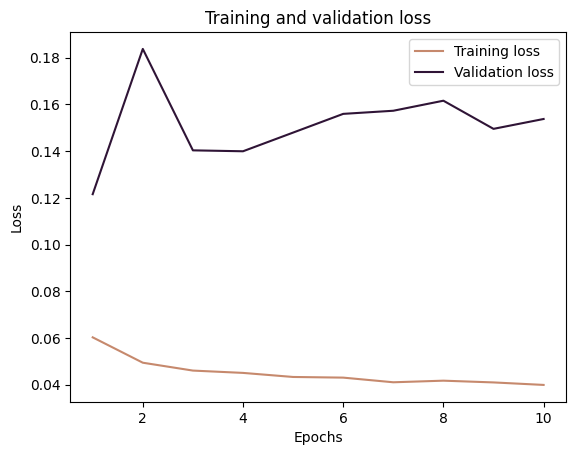

C:\Users\katko\AppData\Local\Temp\ipykernel_5840\3317894727.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, IOU, 'y', label='Training IOU',color = '#c6896dff')
C:\Users\katko\AppData\Local\Temp\ipykernel_5840\3317894727.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_IOU, 'r', label='Validation IOU',color = '#2f1436ff')


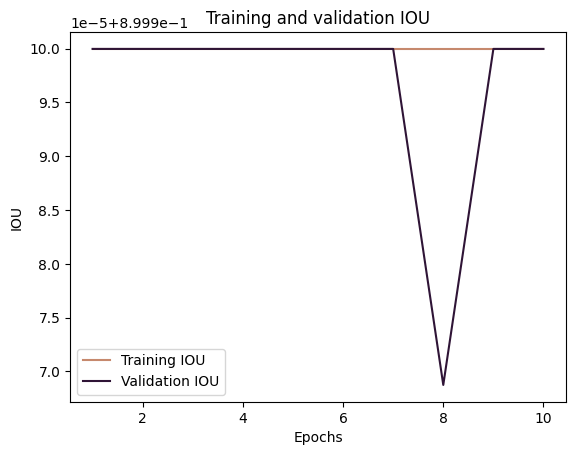

In [68]:

###
#Отображение точности и ошибки в каждую эпоху
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss', color = '#c6896dff')
plt.plot(epochs, val_loss, 'r', label='Validation loss',color = '#2f1436ff')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

IOU = history.history['io_u_9']
val_IOU = history.history['val_io_u_9']

plt.plot(epochs, IOU, 'y', label='Training IOU',color = '#c6896dff')
plt.plot(epochs, val_IOU, 'r', label='Validation IOU',color = '#2f1436ff')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

1/1 [==============================] - 0s 380ms/step


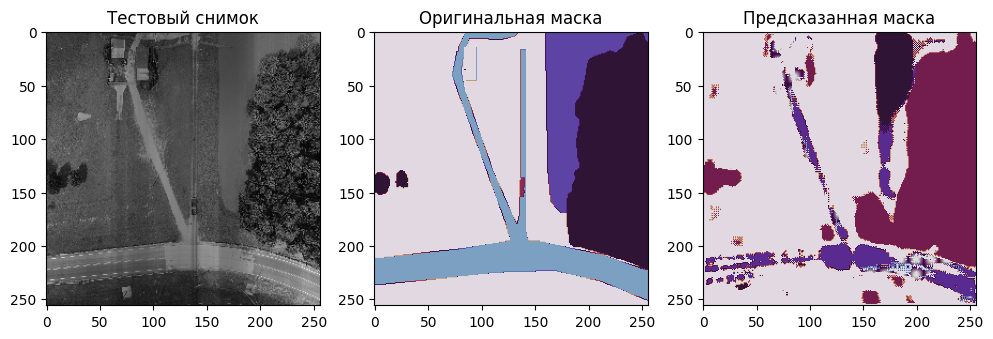

In [69]:
#Предсказание на нескольких изображениях
import random

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Тестовый снимок')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Оригинальная маска')
plt.imshow(ground_truth[:,:,0], cmap='twilight')
plt.subplot(233)
plt.title('Предсказанная маска')
plt.imshow(predicted_img, cmap='twilight')

plt.show()

1/1 [==============================] - 0s 90ms/step


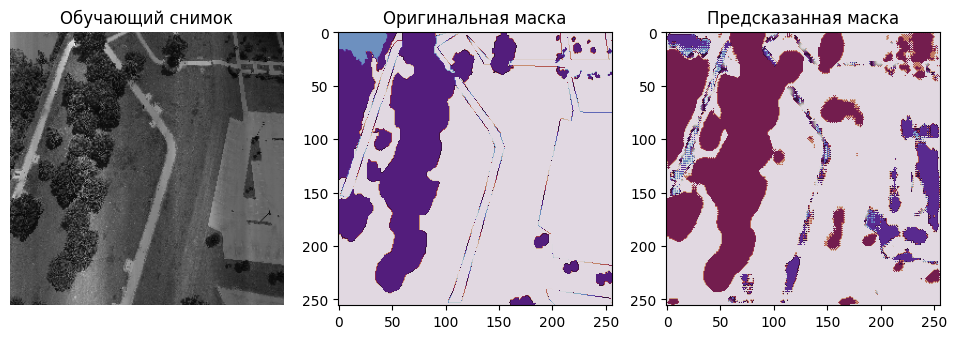

In [71]:

import random
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib import axes

train_img_number = random.randint(0, len(X_train))
train_img = X_train[train_img_number]
ground_truth=y_train[train_img_number]
train_img_norm=train_img[:,:,0][:,:,None]
train_img_input=np.expand_dims(train_img_norm, 0)
prediction = (model.predict(train_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Обучающий снимок')
plt.axis("off")
plt.imshow(train_img[:,:,0], cmap= 'gray')
plt.subplot(232)
plt.title('Оригинальная маска')
plt.imshow(ground_truth, cmap='twilight')
plt.subplot(233)
plt.title('Предсказанная маска')
plt.imshow(predicted_img, cmap='twilight')
plt.show()
